In [30]:
# using python 3.9.7
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import os
import glob


In [4]:
folderpath = '/Users/samuelfogarty/OneDrive/Desktop/OneDrive/photondetectortests/data/06-10-2022/'
modules = ['module1/','module2/','module3/','module4/']
channels = ['ch1/','ch2/','ch3/','ch4/']

In [5]:
os.listdir(folderpath+modules[0]+channels[0])

['hist_200n.csv', '.DS_Store', 'hist_200n.png']

In [7]:
glob.glob(folderpath+modules[0]+channels[0]+'*.csv')

['/Users/samuelfogarty/OneDrive/Desktop/OneDrive/photondetectortests/data/06-10-2022/module1/ch1/hist_200n.csv']

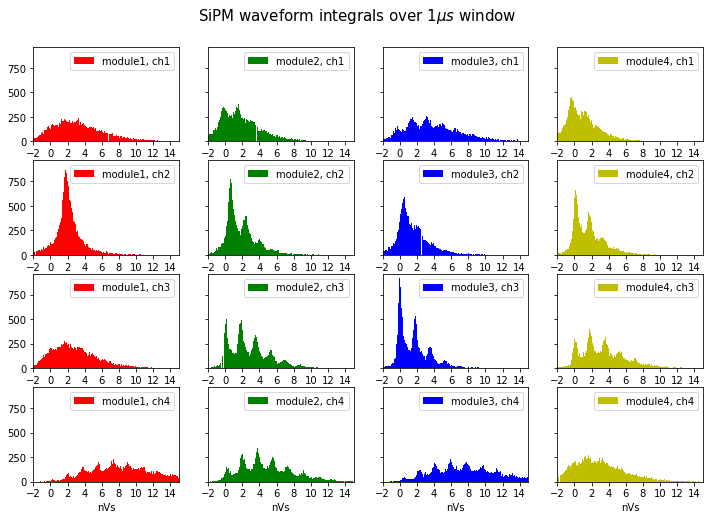

In [50]:
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=False, sharey=True, figsize=(12,8))
#fig.suptitle(r'FD PDS $LN_2$ LED Tests', y=1.05,fontsize=16)
fig.suptitle(r'SiPM waveform integrals over $1\mu s$ window', y=0.95,fontsize=15)
for i,module in enumerate(modules):
    modulepath = folderpath + module
    for j,channel in enumerate(channels):
        channelpath = modulepath + channel
        histpath = glob.glob(channelpath + '*.csv')[0]
        hist_label = module.strip('/') + ', ' + channel.strip('/')
        data = np.loadtxt(histpath,delimiter=',', skiprows=1)
        bins = data[:,0]
        counts = data[:,1]
        binwidth = (bins[-1] - bins[0]) / len(bins)
        if i == 0:
            c = 'r'
        elif i == 1:
            c = 'g'
        elif i == 2:
            c = 'b'
        elif i == 3:
            c = 'y'
        axes[j][i].bar(bins*1e9, counts, width = binwidth*1e9, color = c,align = 'center',label=hist_label)
        axes[j][i].legend()

        if j == 3:
            axes[j][i].set_xlabel('nVs')
        loc = plticker.MultipleLocator(base=2.0) # this locator puts ticks at regular intervals
        axes[j][i].xaxis.set_major_locator(loc)
        axes[j][i].set_xlim(-2,15)

#plt.savefig('SiPM_integrals_allmodulesandchannels.pdf')
        